# Exploration pré-site : parité de la parole (CSA/INA 2019-2020)

Analyse exploratoire réalisée avant la mise en page du site pour identifier les indicateurs et graphiques clés sur la représentation des femmes dans l'audiovisuel.

- Jeux de données : `stv_chaines.csv` (éditeurs/groupes/médias) et `stv_genres_programmes.csv` (types d'émissions)
- Axes testés : volumes globaux, taux d'expression par acteur, panorama par genre de programme, relation volume vs taux d'expression.

## Préparation et chargement des données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
pd.options.display.float_format = "{:.3f}".format

DATA_DIR = Path("../data")
chaines = pd.read_csv(DATA_DIR / "chaines.csv")
genres = pd.read_csv(DATA_DIR / "genres_programmes.csv")

print(f"chaines: {chaines.shape}, genres: {genres.shape}")
print("Champs disponibles (chaines):", chaines.columns.tolist())
print("Champs disponibles (genres):", genres.columns.tolist())

display(chaines.head(3))
display(genres.head(3))

chaines: (40, 17), genres: (13, 15)
Champs disponibles (chaines): ['media', 'Editeur', 'group', 'nb_declarations_2020', 'total_declarations_duration_2020', 'women_speech_duration_2020', 'men_speech_duration_2020', 'other_duration_2020', 'women_expression_rate_2020', 'speech_rate_2020', 'nb_declarations_2019', 'total_declarations_duration_2019', 'women_speech_duration_2019', 'men_speech_duration_2019', 'other_duration_2019', 'women_expression_rate_2019', 'speech_rate_2019']
Champs disponibles (genres): ['genre', 'nb_declarations_2020', 'total_declarations_duration_2020', 'women_speech_duration_2020', 'men_speech_duration_2020', 'other_duration_2020', 'women_expression_rate_2020', 'speech_rate_2020', 'nb_declarations_2019', 'total_declarations_duration_2019', 'women_speech_duration_2019', 'men_speech_duration_2019', 'other_duration_2019', 'women_expression_rate_2019', 'speech_rate_2019']


,media,Editeur,group,nb_declarations_2020,total_declarations_duration_2020,women_speech_duration_2020,men_speech_duration_2020,other_duration_2020,women_expression_rate_2020,speech_rate_2020,nb_declarations_2019,total_declarations_duration_2019,women_speech_duration_2019,men_speech_duration_2019,other_duration_2019,women_expression_rate_2019,speech_rate_2019
0,radio,Europe 1,Lagardère Active,3602.000,14877545.460,5432042.700,8220712.700,1224790.060,0.398,0.918,1684.000,9823492.720,3658937.500,5239559.620,924995.600,0.411,0.906
1,radio,Fip,Radio France,199.000,5270382.760,154044.200,64874.400,5051464.160,0.704,0.042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,radio,France Culture,Radio France,2689.000,6933822.840,2357921.720,3762353.060,813548.060,0.385,0.883,2816.000,6959811.160,2309011.640,3907866.700,742932.820,0.371,0.893


,genre,nb_declarations_2020,total_declarations_duration_2020,women_speech_duration_2020,men_speech_duration_2020,other_duration_2020,women_expression_rate_2020,speech_rate_2020,nb_declarations_2019,total_declarations_duration_2019,women_speech_duration_2019,men_speech_duration_2019,other_duration_2019,women_expression_rate_2019,speech_rate_2019
0,Information - Journal,11770,31573605.200,10733020.960,16666252.560,4174331.680,0.392,0.868,12172.000,46426696.820,15227561.640,23912775.340,7286359.840,0.389,0.843
1,Information - Magazine,8839,43921146.180,12265253.540,28520630.380,3135262.260,0.301,0.929,10773.000,53435793.920,14629241.660,33703544.660,5103007.600,0.303,0.905
2,Information - Autres émissions,475,873112.460,286694.280,489202.080,97216.100,0.370,0.889,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Vérifications rapides
- Distribution des colonnes numériques
- Manquants potentiels à gérer dans les graphiques

In [2]:
numeric_cols = [col for col in chaines.columns if chaines[col].dtype != 'object']
summary = chaines[numeric_cols].describe().T[['mean', 'min', 'max']]
missing = pd.DataFrame({
    'chaines': chaines.isna().sum(),
    'genres': genres.isna().sum()
}).fillna(0).astype(int)

print("Statistiques rapides (chaines)")
display(summary.head(10))

print("Colonnes avec des valeurs manquantes")
display(missing[(missing['chaines']>0) | (missing['genres']>0)])

Statistiques rapides (chaines)


,mean,min,max
nb_declarations_2020,1383.886,199.000,4883.000
total_declarations_duration_2020,5050016.377,1125000.000,14877545.460
women_speech_duration_2020,1396768.307,154044.200,5432042.700
men_speech_duration_2020,2607390.019,64874.400,10618222.620
other_duration_2020,1045858.051,117638.980,5051464.160
women_expression_rate_2020,0.368,0.130,0.704
speech_rate_2020,0.767,0.042,0.971
nb_declarations_2019,1139.378,81.000,5002.000
total_declarations_duration_2019,4702226.853,250652.480,14630044.980
women_speech_duration_2019,1317655.179,58562.200,3658937.500


Colonnes avec des valeurs manquantes


,chaines,genres
men_speech_duration_2019,3,4
men_speech_duration_2020,5,0
nb_declarations_2019,3,4
nb_declarations_2020,5,0
other_duration_2019,3,4
other_duration_2020,5,0
speech_rate_2019,3,4
speech_rate_2020,5,0
total_declarations_duration_2019,3,4
total_declarations_duration_2020,5,0


## Volume global de parole (2019 vs 2020)
Répartition femmes/hommes/autres en volume et évolution du taux global d'expression des femmes.

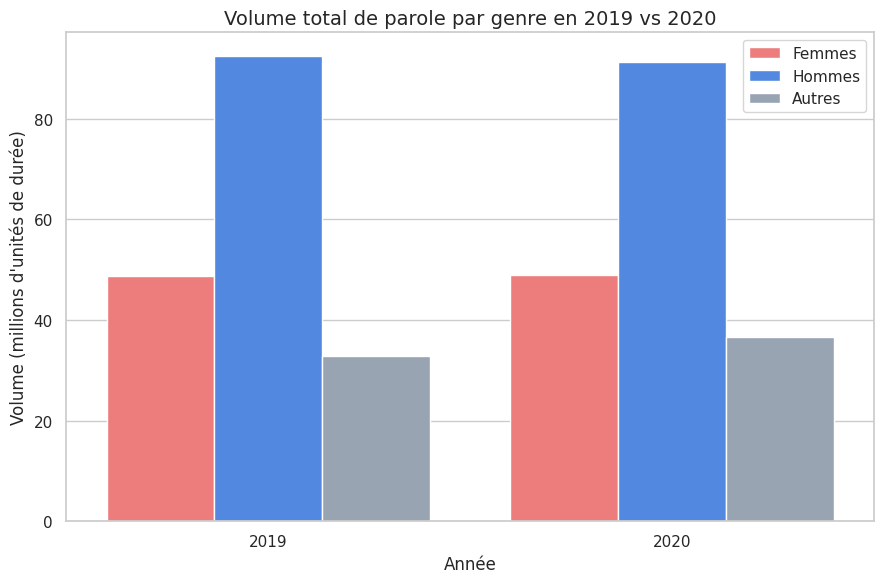

annee
2019   0.280
2020   0.277
Name: part_femmes, dtype: float64


In [3]:
totals = pd.DataFrame({
    'annee': ['2019', '2020'],
    'Femmes': [chaines['women_speech_duration_2019'].sum(), chaines['women_speech_duration_2020'].sum()],
    'Hommes': [chaines['men_speech_duration_2019'].sum(), chaines['men_speech_duration_2020'].sum()],
    'Autres': [chaines['other_duration_2019'].sum(), chaines['other_duration_2020'].sum()],
})

totals_long = totals.melt(id_vars='annee', var_name='categorie', value_name='duree')
totals_long['duree_millions'] = totals_long['duree'] / 1e6

share_femmes = totals.set_index('annee')
share_femmes['part_femmes'] = share_femmes['Femmes'] / (share_femmes['Femmes'] + share_femmes['Hommes'] + share_femmes['Autres'])

fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(data=totals_long, x='annee', y='duree_millions', hue='categorie', palette=['#ff6b6b','#3b82f6','#94a3b8'], ax=ax)
ax.set_ylabel("Volume (millions d'unités de durée)")
ax.set_xlabel('Année')
ax.set_title('Volume total de parole par genre en 2019 vs 2020')
ax.legend(title='')
plt.tight_layout()
plt.show()

print(share_femmes['part_femmes'])

## Par groupe audiovisuel
Comparaison des taux d'expression moyens (pondération simple) pour repérer les groupes les plus équilibrés.

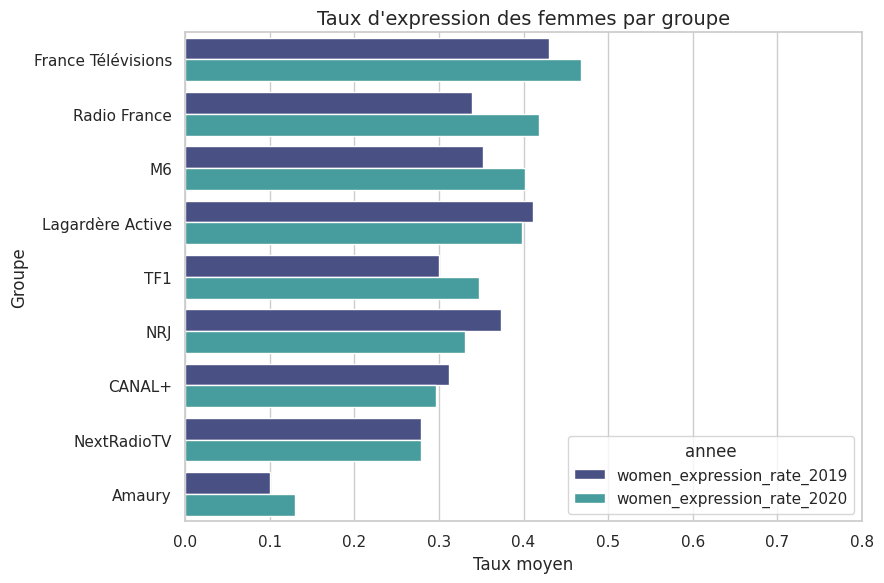

                 group  women_expression_rate_2019  women_expression_rate_2020
4   France Télévisions                       0.431                       0.468
10        Radio France                       0.339                       0.418
7                   M6                       0.352                       0.402
5     Lagardère Active                       0.411                       0.398
11                 TF1                       0.300                       0.347


In [4]:
group_rates = (chaines
    .groupby('group')[['women_expression_rate_2019', 'women_expression_rate_2020']]
    .mean()
    .reset_index()
    .dropna()
    .sort_values('women_expression_rate_2020', ascending=False)
)

group_long = group_rates.melt(id_vars='group', var_name='annee', value_name='taux')

plt.figure(figsize=(9,6))
sns.barplot(data=group_long, y='group', x='taux', hue='annee', palette='mako')
plt.title("Taux d'expression des femmes par groupe")
plt.xlabel('Taux moyen')
plt.ylabel('Groupe')
plt.xlim(0, 0.8)
plt.tight_layout()
plt.show()

print(group_rates.head())

## Éditeurs les plus vertueux (2020)
Zoom sur les meilleurs taux 2020 et évolution par rapport à 2019.

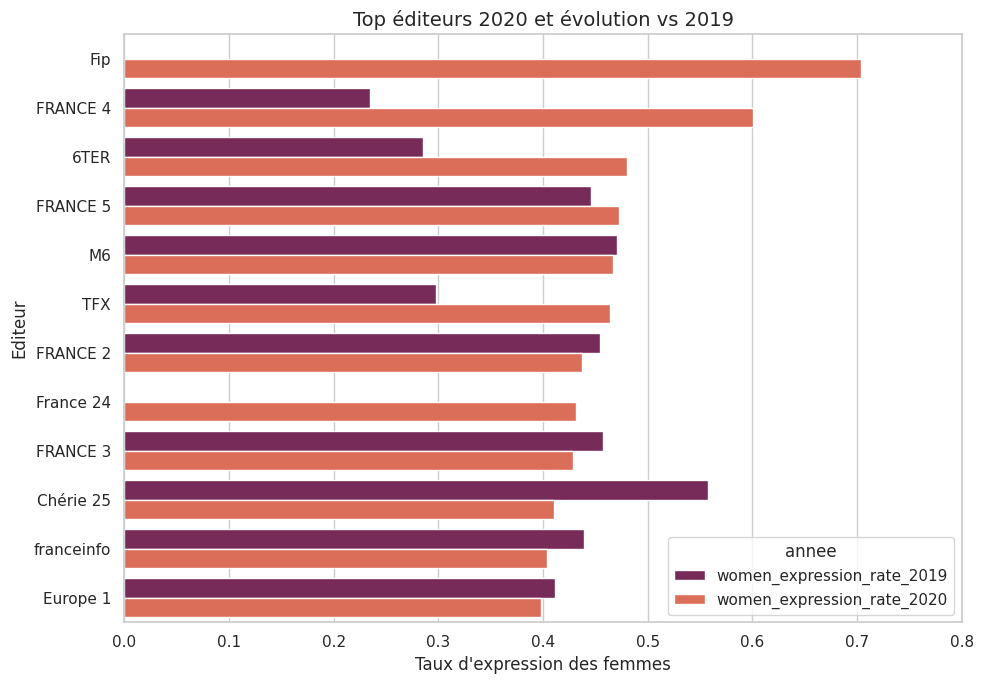

/tmp/ipykernel_327423/1063731846.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_editeurs.sort_values('delta'), y='Editeur', x='delta', palette='coolwarm')


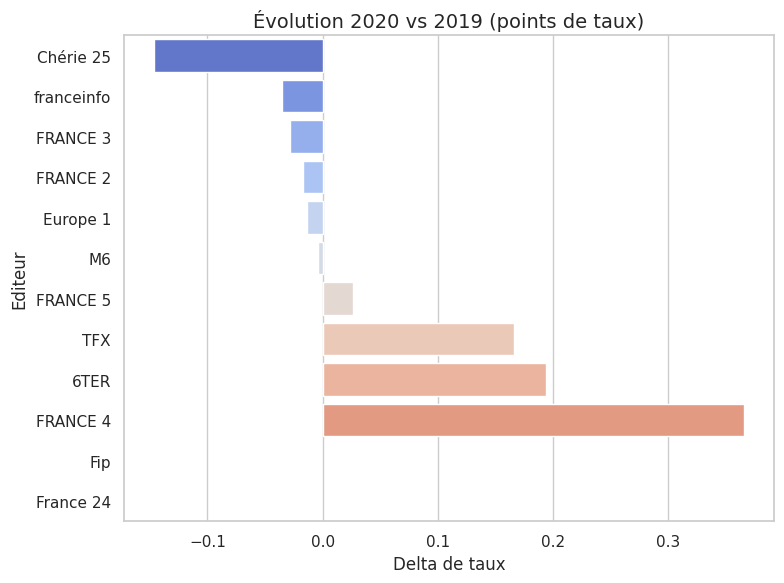

     Editeur               group  women_expression_rate_2019  \
1        Fip        Radio France                         NaN   
21  FRANCE 4  France Télévisions                       0.235   
13      6TER                  M6                       0.286   
22  FRANCE 5  France Télévisions                       0.446   
26        M6                  M6                       0.471   

    women_expression_rate_2020  delta  
1                        0.704    NaN  
21                       0.600  0.366  
13                       0.480  0.194  
22                       0.472  0.027  
26                       0.467 -0.004  


In [5]:
editeurs = (chaines[
    ['Editeur', 'group', 'women_expression_rate_2019', 'women_expression_rate_2020', 'women_speech_duration_2020']]
    .dropna(subset=['women_expression_rate_2020'])
)

top_editeurs = editeurs.sort_values('women_expression_rate_2020', ascending=False).head(12)
top_long = top_editeurs.melt(id_vars=['Editeur', 'group'], value_vars=['women_expression_rate_2019', 'women_expression_rate_2020'],
                            var_name='annee', value_name='taux')

plt.figure(figsize=(10,7))
sns.barplot(data=top_long, y='Editeur', x='taux', hue='annee', palette='rocket')
plt.title("Top éditeurs 2020 et évolution vs 2019")
plt.xlabel("Taux d'expression des femmes")
plt.xlim(0, 0.8)
plt.tight_layout()
plt.show()

# Variation 2020 - 2019
plt.figure(figsize=(8,6))
top_editeurs['delta'] = top_editeurs['women_expression_rate_2020'] - top_editeurs['women_expression_rate_2019']
sns.barplot(data=top_editeurs.sort_values('delta'), y='Editeur', x='delta', palette='coolwarm')
plt.title('Évolution 2020 vs 2019 (points de taux)')
plt.xlabel('Delta de taux')
plt.tight_layout()
plt.show()

print(top_editeurs[['Editeur','group','women_expression_rate_2019','women_expression_rate_2020','delta']].head())

## Radio vs TV
Comparaison des taux moyens par type de média.

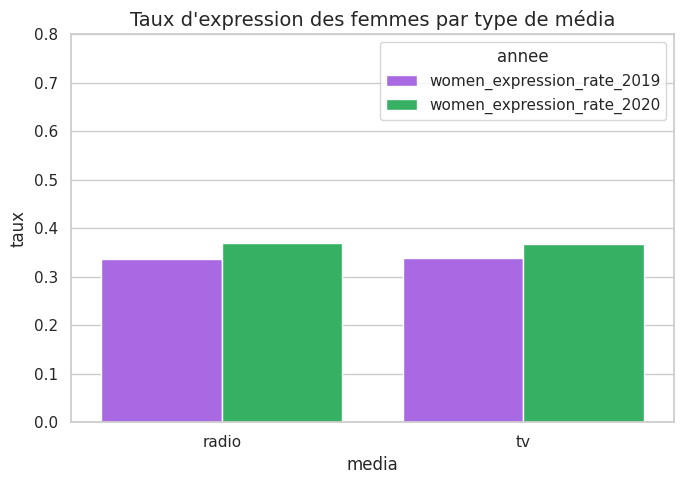

   media  women_expression_rate_2019  women_expression_rate_2020
0  radio                       0.337                       0.370
1     tv                       0.340                       0.367


In [6]:
media_rates = (chaines
    .groupby('media')[['women_expression_rate_2019', 'women_expression_rate_2020']]
    .mean()
    .reset_index()
)

media_long = media_rates.melt(id_vars='media', var_name='annee', value_name='taux')

plt.figure(figsize=(7,5))
sns.barplot(data=media_long, x='media', y='taux', hue='annee', palette=['#a855f7','#22c55e'])
plt.title("Taux d'expression des femmes par type de média")
plt.ylim(0, 0.8)
plt.tight_layout()
plt.show()

print(media_rates)

## Genres de programmes
Ordre des genres par taux d'expression des femmes (moyenne par genre).

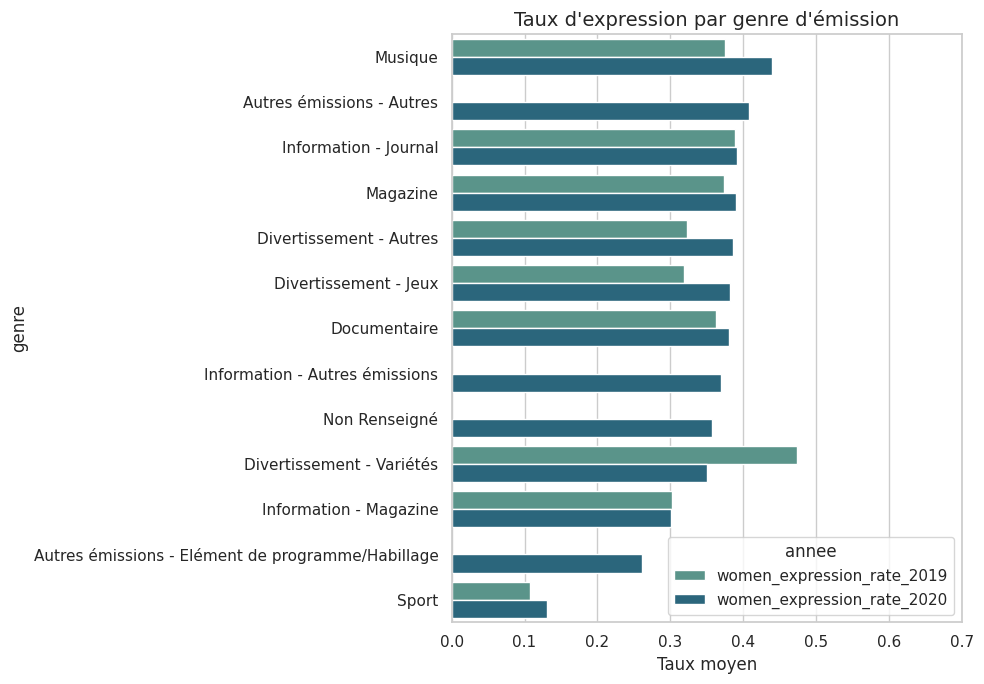

                        genre  women_expression_rate_2020
12                    Musique                       0.440
10  Autres émissions - Autres                       0.408
0       Information - Journal                       0.392
4                    Magazine                       0.390
7     Divertissement - Autres                       0.387


In [7]:
genres_sorted = genres.sort_values('women_expression_rate_2020', ascending=False)
genres_long = genres_sorted[['genre','women_expression_rate_2019','women_expression_rate_2020']].melt(
    id_vars='genre', var_name='annee', value_name='taux')

plt.figure(figsize=(10,7))
sns.barplot(data=genres_long, y='genre', x='taux', hue='annee', palette='crest', order=genres_sorted['genre'])
plt.title("Taux d'expression par genre d'émission")
plt.xlabel('Taux moyen')
plt.xlim(0, 0.7)
plt.tight_layout()
plt.show()

print(genres_sorted[['genre','women_expression_rate_2020']].head())

## Volume vs qualité d'expression
Position des éditeurs : volume total vs taux d'expression 2020 (pour détecter les bons élèves à forte audience).

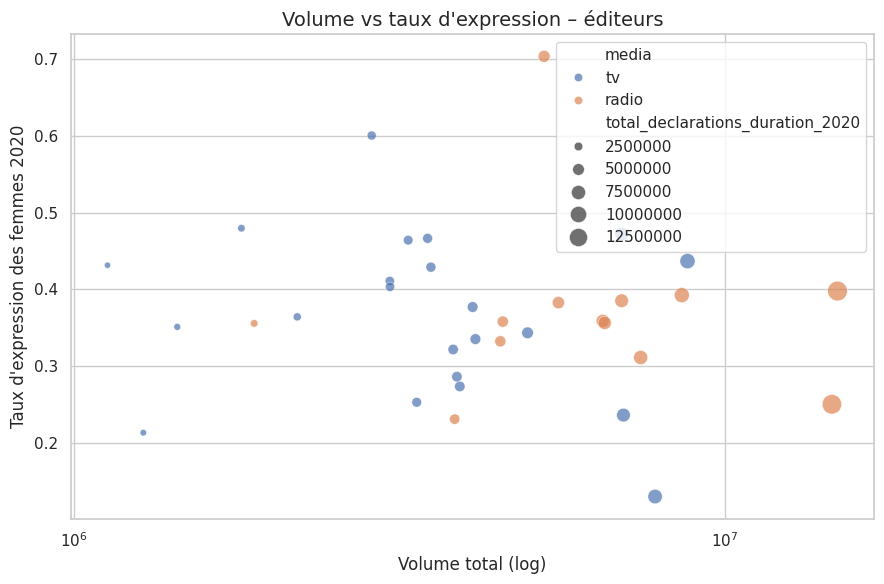

,Editeur,women_expression_rate_2020,total_declarations_duration_2020,media
12,Fip,0.704,5270382.760,radio
10,FRANCE 4,0.600,2863927.760,tv
0,6TER,0.480,1806579.220,tv
11,FRANCE 5,0.472,6932185.140,tv
23,M6,0.467,3490507.420,tv


In [8]:
volume_quality = (chaines
    .groupby('Editeur', as_index=False)
    .agg({
        'women_expression_rate_2020': 'mean',
        'total_declarations_duration_2020': 'sum',
        'media': 'first'
    })
    .dropna()
)

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=volume_quality,
    x='total_declarations_duration_2020',
    y='women_expression_rate_2020',
    hue='media',
    size='total_declarations_duration_2020',
    sizes=(20, 200),
    alpha=0.7
)
plt.xscale('log')
plt.xlabel('Volume total (log)')
plt.ylabel("Taux d'expression des femmes 2020")
plt.title("Volume vs taux d'expression – éditeurs")
plt.tight_layout()
plt.show()

volume_quality.sort_values('women_expression_rate_2020', ascending=False).head()

## Idées pour le site
- Le taux global recule légèrement en 2020 (~28% → ~27,6%) malgré un volume total stable : à mettre en avant en intro.
- Mettre en regard groupes/éditeurs les plus équilibrés (France Télévisions, Radio France) et ceux en retard.
- Le contraste Radio/TV est visible : utile pour un toggle ou un comparatif.
- Certains genres d'émissions (Musique, magazines) sont plus vertueux que d'autres : intéressant pour une section "formats".
- La corrélation volume/taux est imparfaite : on peut souligner les chaînes grand public avec un bon taux pour valoriser les efforts.